#### 2. WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.


In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

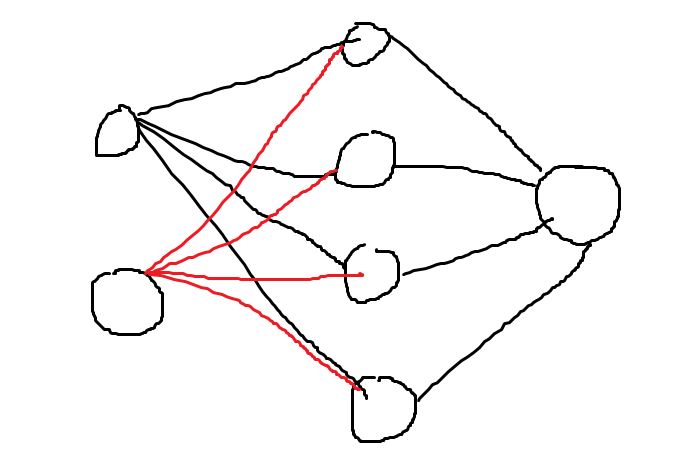

## Model Description
The model contains a single hidden layer, an input layer and a ouput layer. The output layer contains a single perceptron and the hidden layer contains four perceptron.

The four perceptrons are trained on the basis of boolean inputs using "Perceptron Learning Algorithm" where step function is used as activation function.

After training each perceptron of hidden layer give positive output only for a single combination of boolean inputs.
Finally the output perceptron is trained using the "Perceptron Learning Algorithm" where the inputs given are the outputs from each trained perceptron of the hidden layer & it gives the output mimicking the XOR function.

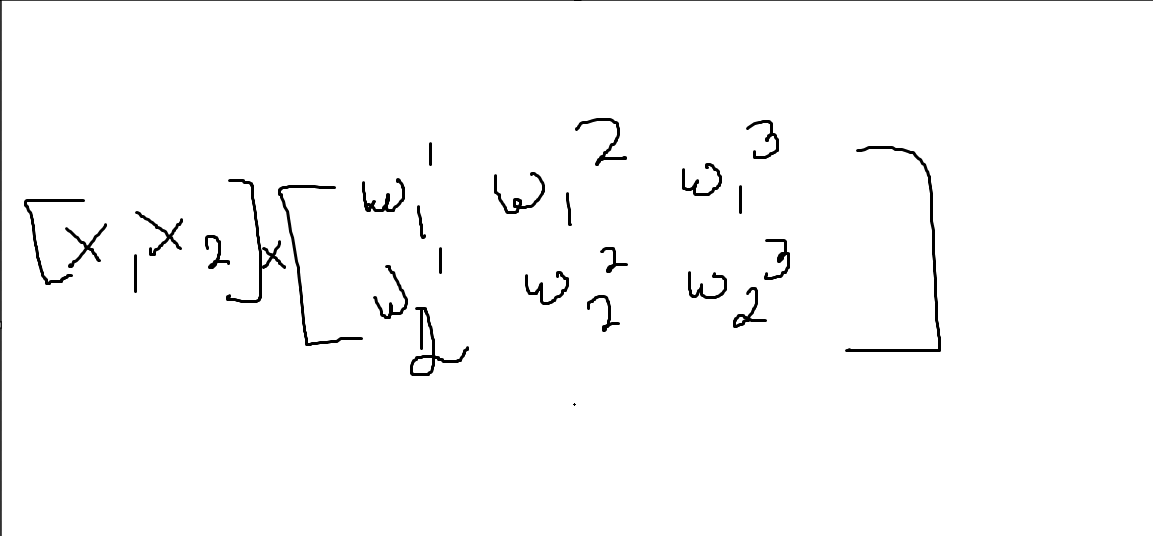

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.randn(input_size + 1)  
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)  
        return self.activation(np.dot(self.weights, x))

    def train(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X] 
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.activation(np.dot(self.weights, X[i]))
                if y[i] == 1 and y_pred == 0:
                    self.weights += self.learning_rate * X[i]
                elif y[i] == 0 and y_pred == 1:
                    self.weights -= self.learning_rate * X[i]

    def evaluate(self, X, y):
        y_pred = [self.predict(x) for x in X]
        count = 0
        for i in range(len(y)) :
            if y_pred[i]==y[i] : count+=1
        accuracy = count / len(y)
        return accuracy, y_pred

    def compute_confusion_matrix(self, X, y):
        y_pred = [self.predict(x) for x in X]
        cm = confusion_matrix(y, y_pred)
        return cm

In [69]:
fun1_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun1_y = np.array([0, 0, 0, 1])  

fun1_perceptron = Perceptron(input_size=2)
fun1_perceptron.train(fun1_X, fun1_y)
fun1_accuracy, fun1_predictions = fun1_perceptron.evaluate(fun1_X, fun1_y)

In [70]:
fun2_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun2_y = np.array([0, 0, 1, 0])

fun2_perceptron = Perceptron(input_size=2)
fun2_perceptron.train(fun2_X, fun2_y)
fun2_accuracy, fun2_predictions = fun2_perceptron.evaluate(fun2_X, fun2_y)

In [71]:
fun3_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun3_y = np.array([0, 1, 0, 0])  

fun3_perceptron = Perceptron(input_size=2)
fun3_perceptron.train(fun3_X, fun3_y)
fun3_accuracy, fun3_predictions = fun3_perceptron.evaluate(fun3_X, fun3_y)

In [72]:
fun4_X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun4_y = np.array([1, 0, 0, 0])  

fun4_perceptron = Perceptron(input_size=2)
fun4_perceptron.train(fun4_X, fun4_y)
fun4_accuracy, fun4_predictions = fun4_perceptron.evaluate(fun4_X, fun4_y)

In [84]:
X = np.array([fun1_predictions, fun2_predictions, fun3_predictions, fun4_predictions])
y = np.array ([0,1,1,0]) 
perceptron = Perceptron(input_size=4)
perceptron.train(X, y)
accuracy, final_predictions = perceptron.evaluate(X, y)

In [85]:
print(f"\nfinal Perceptron Weights: {perceptron.weights}")
print(f"final Perceptron Predictions: {final_predictions}")
print(f"final Perceptron Accuracy: {accuracy * 100:.2f}%")


final Perceptron Weights: [ 0.3407626  -0.46221718 -0.26951375  1.06902397 -0.52587967]
final Perceptron Predictions: [0, 1, 1, 0]
final Perceptron Accuracy: 100.00%


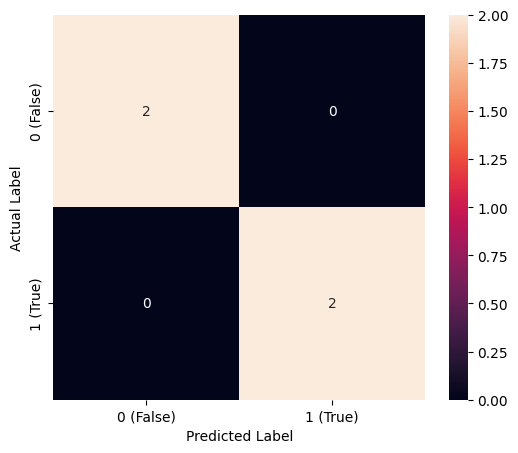

In [87]:
plt.figure(figsize=(6, 5))
sns.heatmap(perceptron.compute_confusion_matrix([fun1_predictions, fun2_predictions, fun3_predictions, fun4_predictions], [0,1,1,0]), annot=True, fmt="d", xticklabels=["0 (False)", "1 (True)"], yticklabels=["0 (False)", "1 (True)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()